# Atividade 01 - Parte01 - Inventário de emissões com Python
Alunas: Alice Alegria Ramos e Ana Carolina Carvalho

## Lendo a planilha com as Emissões da AP-42:

In [3]:
import pandas as pd
import os

# Coletando o caminho da pasta atual
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = os.path.join(cwd, 'tabelas')
print(path)

# Indicando o nome do arquivo
chapterNumer = 10
supChapter = 6
file = f'chpt_{chapterNumer}_{supChapter}.csv'
print(file)

# Abrindo o arquivo com o pandas
caminho_arquivo = os.path.join(path, file)
fe = pd.read_csv(caminho_arquivo)
print(fe)


C:\Users\Ana Carolina\Documents\GitHub\ENS410064\venv\Scripts\tabelas
chpt_10_6.csv
     Source    Nox    CO    CO2
0     RDDWH  0.460  2.85    0.0
1     RDDWS  0.290  0.34    0.0
2     RDDWM  0.900  0.29  269.0
3    RDGDWS  1.350  1.75  286.5
4    RDGDWM  0.700  0.38    0.0
5      RDNH  0.012  0.60  155.5
6     RDGNS  0.000  0.00  118.5
7  RDIHANGS  0.150  0.06   19.1
8  TDWB-UFH  0.000  0.00  223.5


## Gerando gráficos dos Fatores de Emissão

Source    RDDWHRDDWHRDDWHRDDWHRDDWHRDDWHRDDWHRDDWHRDDWHR...
Nox                                                7808.964
CO                                                 12677.94
CO2                                               2167786.2
dtype: object
1
2
3


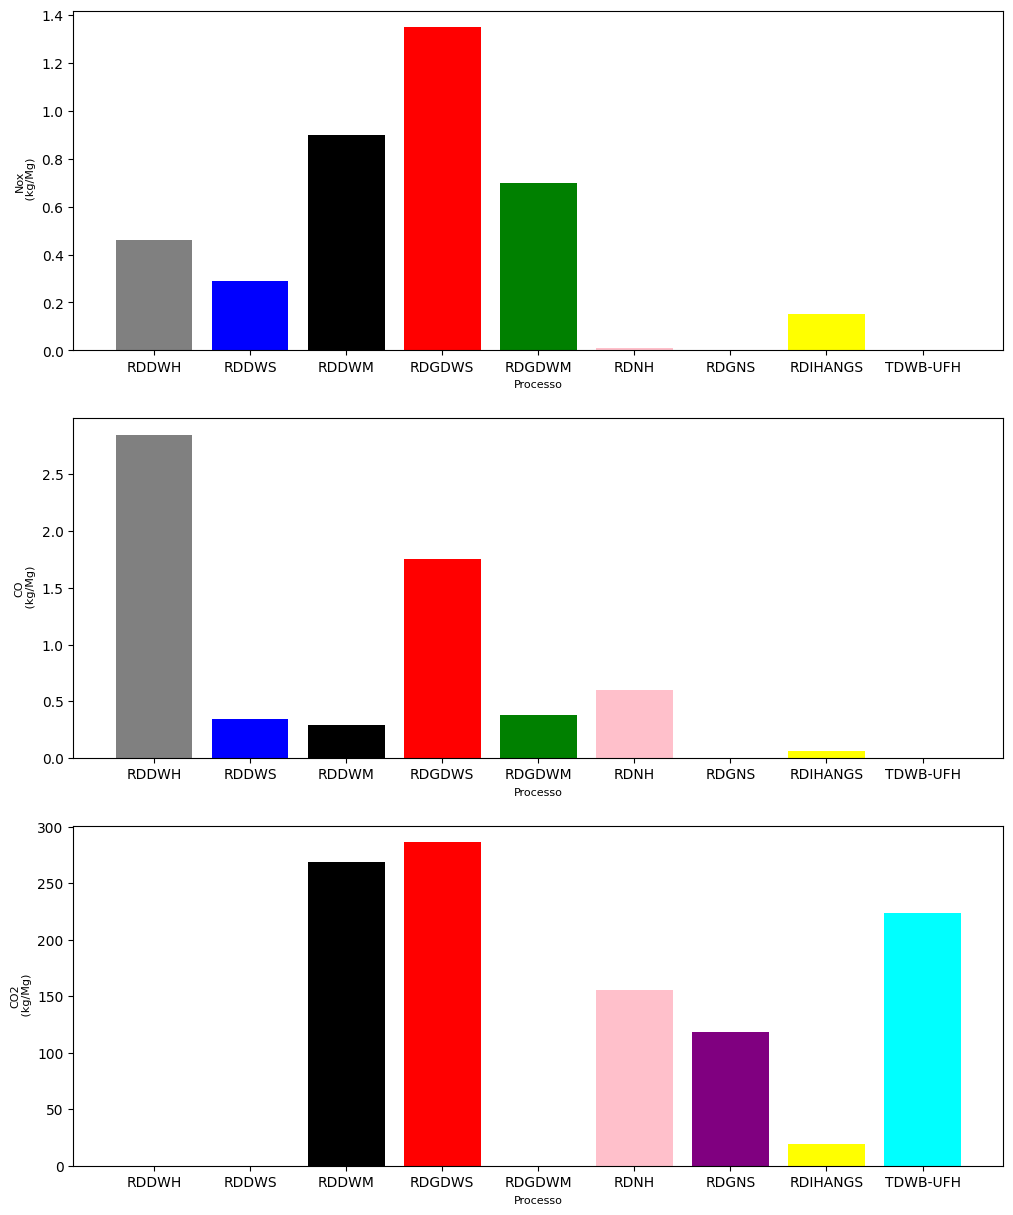

In [4]:
import matplotlib.pyplot as plt

atv = 2022
emis = fe * atv

# Somando o dataframe
print(emis.sum())

# Criando a figura com matplotlib
# Criando subplots com número de linhas igual ao número de poluentes
# Sharex significa compartilhar o eixo x
fig, ax = plt.subplots(len(fe.columns) - 1, 1, figsize=(12, 15))

# Loop para preencher os subplots com os gráficos de barra
for ii in range(1, len(fe.columns)):
    print(ii)
    ax[ii - 1].bar(fe['Source'], fe.iloc[:, ii], color=['gray', 'blue', 'black', 'red', 'green', 'pink', 'purple', 'yellow','cyan'])
    ax[ii - 1].set_xlabel('Processo', fontsize=8)
    ax[ii - 1].set_ylabel(fe.columns[ii] + '\n (kg/Mg)', fontsize=8)

# Salvando a figura na pasta figures
# fig.savefig(cwd + '\\figures\\barplot_fatorEmiss.png')


# Taxa de Atividade aleatória com sazonalidade

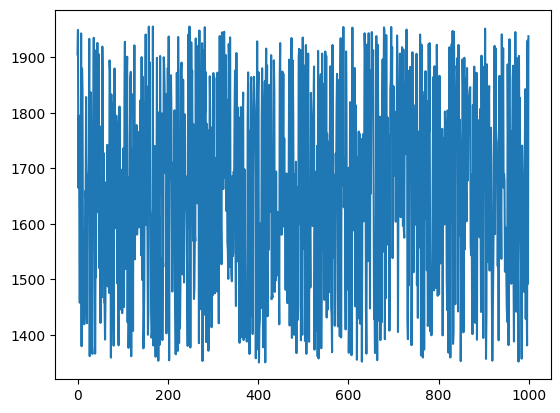

In [7]:
import numpy as np
import pandas as pd

# Definindo os valores máximos e mínimos para o vetor de valores aleatórios
atvMax = 1350 * 1.45
atvMin = 1350
n = 1000

# Gerando o vetor de valores aleatórios
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin

# Criando uma figura e plotando os valores aleatórios
fig, ax = plt.subplots()
ax.plot(atv)
plt.show()


In [8]:
# Criando um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criando um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extraindo os meses das datas e adicionando-os como uma nova coluna no DataFrame
df['Mês'] = df['Data'].dt.month
df['Dia do Ano'] = df['Data'].dt.dayofyear

# Mostrando o DataFrame resultante
print(df)


          Data  Mês  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [9]:
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória baseada no comprimento do vetor de datas
atv = (atvMax - atvMin) * np.random.rand(n) + atvMin
df['Atividade'] = atv

# Exibindo o DataFrame resultante
print(df)

# Salvando o DataFrame em um arquivo CSV
df.to_csv(r"C:\Users\Ana Carolina\Documents\GitHub\ENS410064\venv\Scripts\tabelas\atv.csv", index=False)

          Data  Mês  Dia do Ano    Atividade
0   2024-01-01    1           1  1503.096561
1   2024-01-02    1           2  1687.458561
2   2024-01-03    1           3  1879.723464
3   2024-01-04    1           4  1745.349450
4   2024-01-05    1           5  1448.818373
..         ...  ...         ...          ...
361 2024-12-27   12         362  1386.624329
362 2024-12-28   12         363  1940.469326
363 2024-12-29   12         364  1827.083212
364 2024-12-30   12         365  1417.609188
365 2024-12-31   12         366  1527.820587

[366 rows x 4 columns]


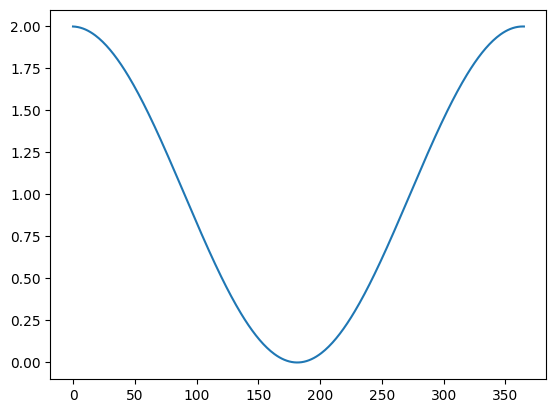

In [10]:
# Criando componente sazonal
sazonalidade = np.cos((2 * np.pi) * df['Dia do Ano'] / 365) + 1  # Taxa de papel produzido diariamente

# Adicionando a sazonalidade ao DataFrame
df['Sazonalidade'] = sazonalidade

# Plotando a sazonalidade
plt.plot(sazonalidade)
plt.show()

# Salvando o DataFrame em um arquivo CSV
df.to_csv(r"C:\Users\Ana Carolina\Documents\GitHub\ENS410064\venv\Scripts\tabelas\atv.csv", index=False)

506873.50684040954


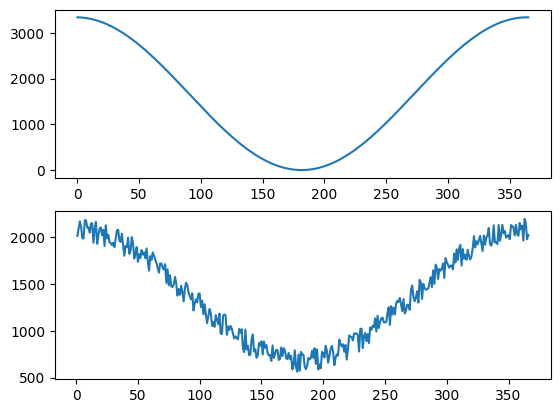

In [11]:
# Criando valores aleatórios com sazonalidade
n = df.shape[0]

# Gerando valores aleatórios
aleatorio = (atvMax - atvMin) * np.random.rand(n) + atvMin
df['Aleatorio'] = aleatorio

# Calculando valores aleatórios com sazonalidade
df['aleatorioSazonal'] = (df['Atividade'] + df['Sazonalidade'] * df['Atividade'].mean()) * 0.415

# Plotando os valores aleatórios com sazonalidade
fig, ax = plt.subplots(2)
ax[0].plot(df['Sazonalidade'] * df['Atividade'].mean())
ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])

# Calculando a média anual dos valores aleatórios com sazonalidade
print(df['aleatorioSazonal'].mean() * 365)

plt.show()

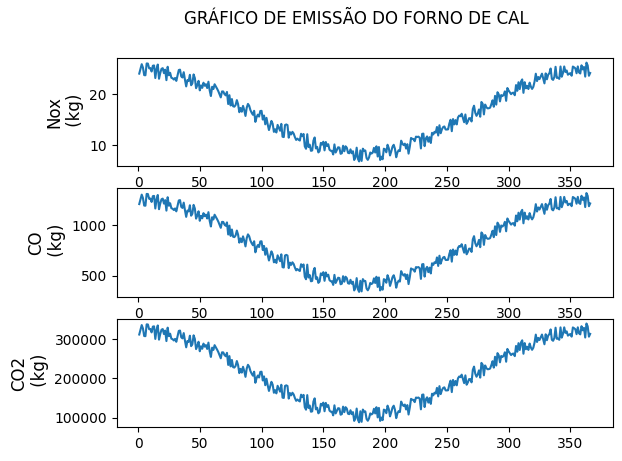

In [12]:
fig,ax= plt.subplots(3)
fig.suptitle('GRÁFICO DE EMISSÃO DO FORNO DE CAL')
for ii in range (1,4):
    ax[ii-1].plot(df['Dia do Ano'], df['aleatorioSazonal']*fe.iloc[5,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

# Cálculo das emissões (todas as atividades)

In [13]:
# Calcular a soma das emissões considerando todos os processos
labels = ['Material Particulado', 'SO2', 'CO']
for ii, label in enumerate(labels, start=1):
    SomaFE = fe.iloc[:, ii].sum()
    print('Dados do', label)
    soma_emissoes = df['aleatorioSazonal'].sum() * SomaFE * 1000 / (24 * 60 * 60)  # Convertendo de kg/dia para g/s
    # Calcular a emissão média em g/s
    emissao_media = df['aleatorioSazonal'].mean() * SomaFE
    # Calcular a emissão mínima em g/s
    emissao_minima = df['aleatorioSazonal'].min() * SomaFE
    # Calcular a emissão máxima em g/s
    emissao_maxima = df['aleatorioSazonal'].max() * SomaFE
    print("Soma das emissões: {:.2f} g/s".format(soma_emissoes))                                            
    print("Emissão média: {:.2f} g/s".format(emissao_media))
    print("Emissão mínima: {:.2f} g/s".format(emissao_minima))
    print("Emissão máxima: {:.2f} g/s".format(emissao_maxima))
    print(' ')


Dados do Material Particulado
Soma das emissões: 22718.85 g/s
Emissão média: 5363.14 g/s
Emissão mínima: 2177.02 g/s
Emissão máxima: 8464.28 g/s
 
Dados do SO2
Soma das emissões: 36884.31 g/s
Emissão média: 8707.11 g/s
Emissão mínima: 3534.42 g/s
Emissão máxima: 13741.86 g/s
 
Dados do CO
Soma das emissões: 6306804.47 g/s
Emissão média: 1488819.42 g/s
Emissão mínima: 604345.61 g/s
Emissão máxima: 2349704.57 g/s
 
